In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
with open('book.txt') as f:
    data = f.read()

In [3]:
len(data)

79959

In [4]:
from tqdm.notebook import tqdm

In [5]:
from transformers import GPT2Model, AutoTokenizer, AutoModelForCausalLM
from memory_gpt2 import *

In [6]:
tokenizer = AutoTokenizer.from_pretrained("distilgpt2")

model = AutoModelForCausalLM.from_pretrained("distilgpt2")

In [7]:
all_tokens = tokenizer.encode(data, return_tensors='pt')

Token indices sequence length is longer than the specified maximum sequence length for this model (22205 > 1024). Running this sequence through the model will result in indexing errors


In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [12]:
model = model.to(device)

In [14]:
def calc_perplexity(model, all_tokens, context_length=100):
    
    losses = []
    # for i in tqdm(range(context_length, all_tokens.shape[-1])):
    for i in tqdm(range(context_length, context_length+100)):
        x = all_tokens[:, max(i-context_length, 0):i]
        x = x.to(device)
        yp = model(input_ids=x, labels=x)
        losses.append(yp.loss.item())
    return losses
    
    
losses = calc_perplexity(model, all_tokens, context_length=100)
    


  0%|          | 0/100 [00:00<?, ?it/s]

In [15]:
import matplotlib.pyplot as plt

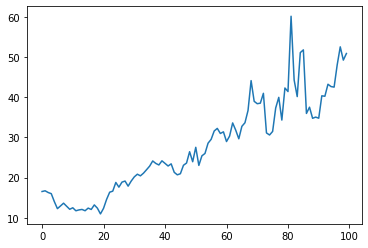

In [18]:
plt.plot(np.e**np.array(losses))

In [19]:
model.config.n_positions

1024

In [1]:
# model.forward(input_ids=all_tokens[:, :100], labels=all_tokens[:, :100])

In [ ]:
model.forward()

In [53]:
all_tokens.shape

torch.Size([1, 22205])